In [1]:

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Histogram computer

In [10]:
def compute_the_histogram(picture):
    numbers = np.zeros(256)
    x  , y= picture.shape
    
    for i in range(x):
        for j in range(y) :
            numbers[picture[i][j]] +=1 
    return numbers

2.1.1:

In the figure below, you can see the main image and its histogram:

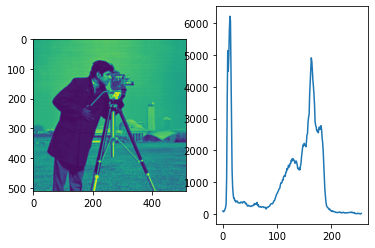

In [4]:
camera_man  = cv2.imread("Camera Man.bmp"  , cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(camera_man)
plt.subplot(1, 2 , 2)
histogram = compute_the_histogram(camera_man)
plt.plot(histogram)


 2.1.1.1 : 
 Here we are going to see the effect of dividing the values of picture bu 3 and analyze the final histogram.

[[52 52 53 ... 50 50 50]
 [52 52 53 ... 50 50 50]
 [52 52 52 ... 50 50 50]
 ...
 [40 41 42 ... 40 37 37]
 [40 41 42 ... 40 37 37]
 [40 41 42 ... 40 37 37]]


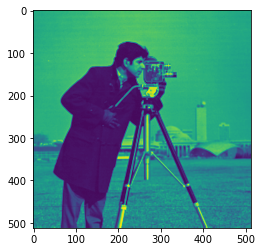

In [6]:
from PIL import Image
x , y  = camera_man.shape
camera_man_D = np.zeros([x , y])
for i in range(x) :
    for j in range(y) :
        o =camera_man[i][j]/3
        camera_man_D[i][j] = int(o)
        
plt.imshow(camera_man_D)
camera_man_D = camera_man_D.astype(int)
print(camera_man_D)


2.1.1.2 : 

In the histograms below, the left histogram is related to the original image, while the right one os assotiated to new image which is divided by 3 . The new picture is darker .

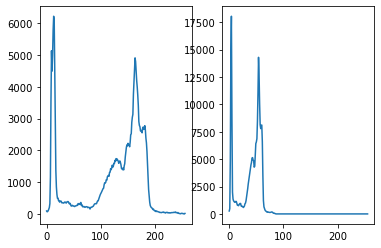

In [163]:

histogram1 = compute_the_histogram(camera_man_D)

plt.subplot(1 , 2, 1)
plt.plot(histogram)
plt.subplot(1 , 2 , 2)
plt.plot(histogram1)

2.1.1.3 :
## Equalization

In [9]:
def equalization(picture2):
 
    x , y = picture2.shape
    pix = np.zeros(256)
    for i in range(x):
        for j in range(y) :
            value_of_pixel = picture2[i][j]
        
            pix[value_of_pixel] += 1
    pix /= (x * y)
    for k in range(1 , 256) :
        pix[k] += pix[k -1]

    for i in range(256) :
        pix[i] *= 255
        pix[i] = round(pix[i])
    return pix


In [165]:
aa = camera_man_D.copy()
print(aa+1)
print(camera_man_D)

[[53 53 54 ... 51 51 51]
 [53 53 54 ... 51 51 51]
 [53 53 53 ... 51 51 51]
 ...
 [41 42 43 ... 41 38 38]
 [41 42 43 ... 41 38 38]
 [41 42 43 ... 41 38 38]]
[[52 52 53 ... 50 50 50]
 [52 52 53 ... 50 50 50]
 [52 52 52 ... 50 50 50]
 ...
 [40 41 42 ... 40 37 37]
 [40 41 42 ... 40 37 37]
 [40 41 42 ... 40 37 37]]


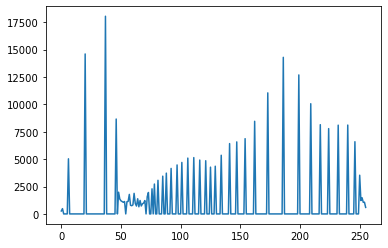

In [8]:
aa = camera_man_D.copy()
equalized_hist = equalization(aa)
x , y = aa.shape
equalized_camera_man_D = np.zeros([x , y])
for i in range(x): 
    for j in range(y):
       equalized_camera_man_D[i][j] =int( equalized_hist[aa[i][j]])
# equalized_histogram_camer_man_D =  equalized_histogram_camer_man_D.astype(int)
equalized_camera_man_D = equalized_camera_man_D.astype(int)
equalized_histogram_camer_man_D = np.zeros(256)
for i in range(x) :
    for j in range(y) : 
        equalized_histogram_camer_man_D[equalized_camera_man_D[i][j]]+=1
plt.plot( equalized_histogram_camer_man_D)

2.1.1.5:


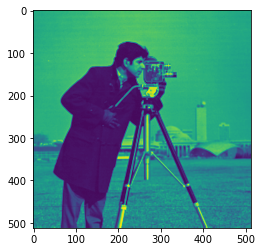

In [9]:
a1 = camera_man_D.copy()
plt.imshow(camera_man_D)

2.1.1.6:

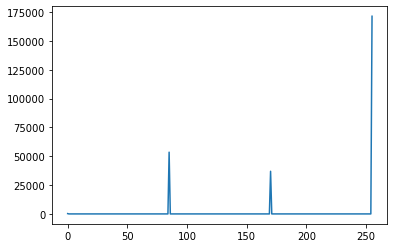

In [39]:
aa = camera_man_D.copy()
a =power_law(aa  , 0.3)

plt.plot(compute_the_histogram(a))

## Normalization

In [13]:
# normalized the pictures
def normalization(picture) :
    Max = np.max(picture)
    Min = np.min(picture)
    Delta = Max - Min
    normal = ((picture - Min)/Delta)*255
    return normal

## Using Log functions
We decide to apply the log functions with diffrent basis .the function below can do this. hte final result :
### Basis = 2
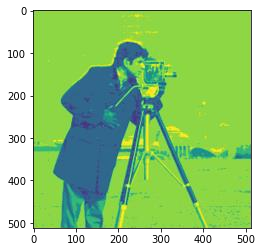
### Basis = 4
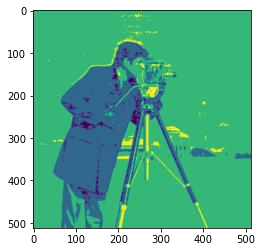
### Basis = 8
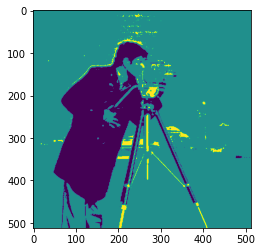


In [11]:
import math
def log_picture(picture  , base) :
    x1 , y1 = picture.shape
    for i in range(x1) :
        for j in range(y1) :
            
            picture[i][j] = math.log(picture[i][j]+1 , base)
    picture =  normalization(picture)
    picture = picture.astype(np.int32)
    return picture

## Power
We can also applying powe finction to our pictures . The considerable fonction can be seen below :
The results:As can be seen, for higher powers, more bright parts of the image are clear It becomes clear and due to the lower powers, the dark parts become clearer for us
### Gamma : 3
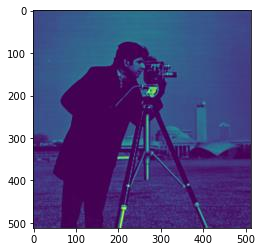
### Gamma : 0.5
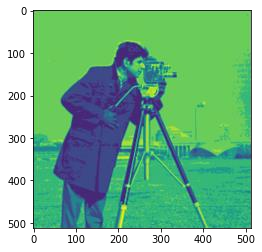
### Gamma : 
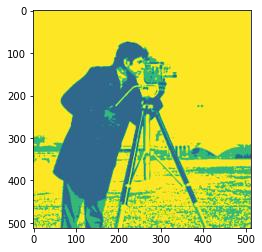

In [12]:
def power_law(picture  , gamma) :
    x  , y = picture.shape
    
    for i in range(x) : 
        for j in range(y) :
            picture[i][j] = math.pow(picture[i][j] , gamma)w
    picture =  normalization(picture)
    picture = picture.astype(np.int32)
    return picture

2.1.1:

In [42]:
pic1 =  cv2.imread("Camera Man.bmp"  , cv2.COLOR_BGR2GRAY)
his_pic1 =compute_the_histogram(pic1)

pic_eq = equalization(pic1)

x , y = pic1.shape
pic2 = np.zeros([x , y])
for i in range(x): 
    for j in range(y):
       pic2[i][j] =int( pic_eq[pic1[i][j]])
# equalized_histogram_camer_man_D =  equalized_histogram_camer_man_D.astype(int)
pic2 = pic2.astype(int)


2.1.4 :

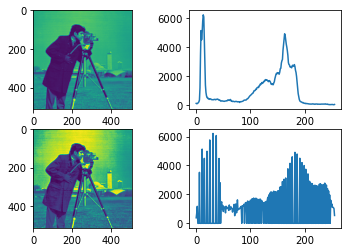

In [43]:
plt.subplot(2 , 2 , 1)
plt.imshow(pic1)

plt.subplot(2 , 2, 2)
plt.plot(his_pic1)

plt.subplot(2, 2, 3)
plt.imshow(pic2 )

plt.subplot(2 , 2, 4)
plt.plot(compute_the_histogram(pic2))

2.1.3 :

In [8]:
def Local_histogram_equalization(window , picture):
        x , y = picture.shape
      
        for i in range(0 , x - window, window) :
            
            for j in range(0 , y-window , window):
                
                sub_picture = np.zeros([window ,window])
                sub_picture = picture[i:i+window , j :j+window]
                LUP = equalization(sub_picture)
                LUP = LUP.astype(int)
                for k in range(0 ,window) :
                    for t in range(window) :
                        sub_picture[k][t] = LUP[sub_picture[k][t]]
                        picture[i+k][j+t] = sub_picture[k][t]
        return picture

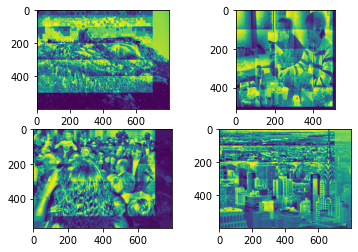

In [12]:

draw(100)

In [6]:
def draw(window):
    
    HE1 = cv2.imread("HE1.jpg"  , cv2.COLOR_BGR2GRAY)
    HE1 = cv2.cvtColor(HE1, cv2.COLOR_BGR2GRAY)
    HE2 = cv2.imread("HE2.jpg"  , cv2.COLOR_BGR2GRAY)
    HE2 = cv2.cvtColor(HE2, cv2.COLOR_BGR2GRAY)
    HE3 = cv2.imread("HE3.jpg"  , cv2.COLOR_BGR2GRAY)
    HE3 = cv2.cvtColor(HE3, cv2.COLOR_BGR2GRAY)
    HE4 = cv2.imread("HE4.jpg"  , cv2.COLOR_BGR2GRAY)
    HE4 = cv2.cvtColor(HE4, cv2.COLOR_BGR2GRAY)


   
    x1 , y1 = HE1.shape
    x2 , y2 = HE2.shape
    x3 , y3 = HE3.shape
    x4 , y4 = HE4.shape

    i1 = Local_histogram_equalization(window , HE1)
    i2 = Local_histogram_equalization(window , HE2)
    i3 = Local_histogram_equalization(window , HE3)
    i4 = Local_histogram_equalization(window , HE4)
        
    plt.subplot(2 , 2 , 1)
    plt.imshow(i1)

    plt.subplot(2 , 2, 2)
    plt.imshow(i2)

    plt.subplot(2, 2, 3)
    plt.imshow(i3)

    plt.subplot(2 , 2, 4)
    plt.imshow(i4)